# Classification algorithms in Wine Quality dataset

## Import libraries and dataset

### Import libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
sns.set(rc = {'figure.figsize':(15,8)})
import warnings
warnings.filterwarnings('ignore')


### Import dataset

In [36]:
dataset = pd.read_csv("./winequalityN.csv")
dataset.dropna(inplace=True)

In [37]:
dataset["quality"].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

## EDA

### Print some values in the dataset

In [38]:
print(dataset.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

### Describe the data in our dataset

In [39]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000         

### Distribution of quality

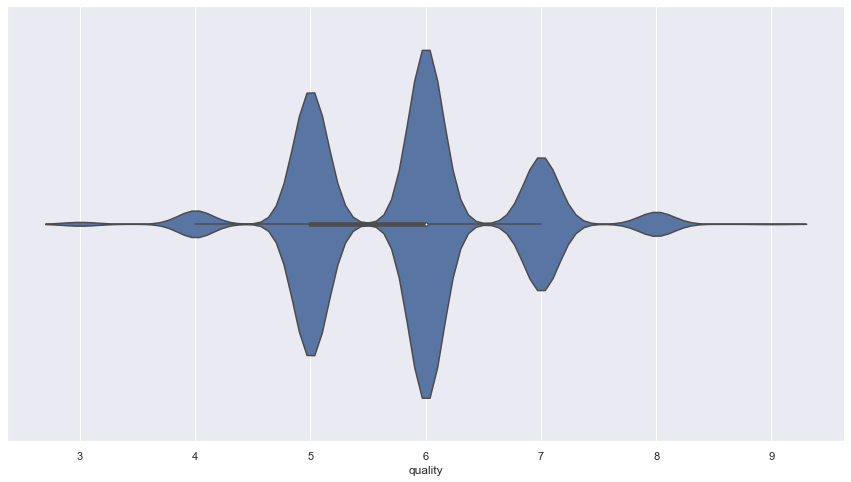

In [40]:
g = sns.violinplot(x=dataset["quality"])
plt.show()

Most of wines have a quality between 5 and 7, only a few have more than 8 and none of them a quality of 10

### White and red wines distribution

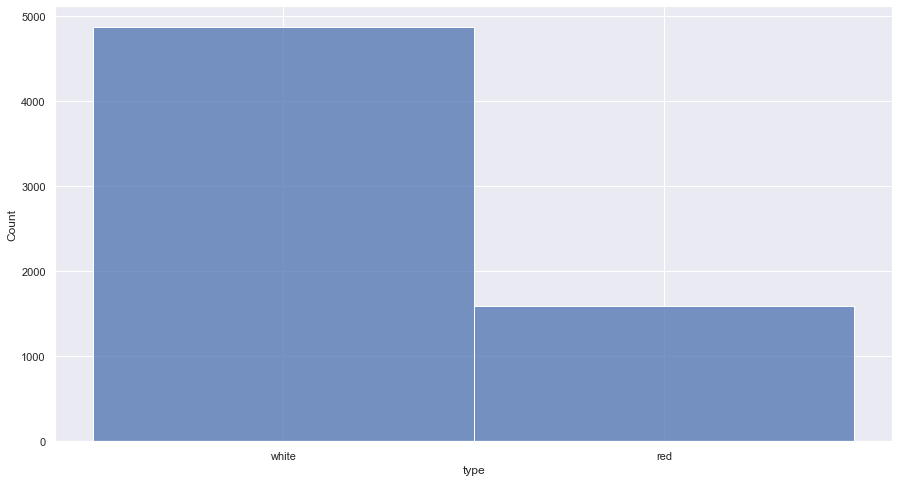

In [41]:
g = sns.histplot(x=dataset["type"])
plt.show()

There is a considerable difference between both. I'll not consider this feature in my classification.

### Correlation matrix

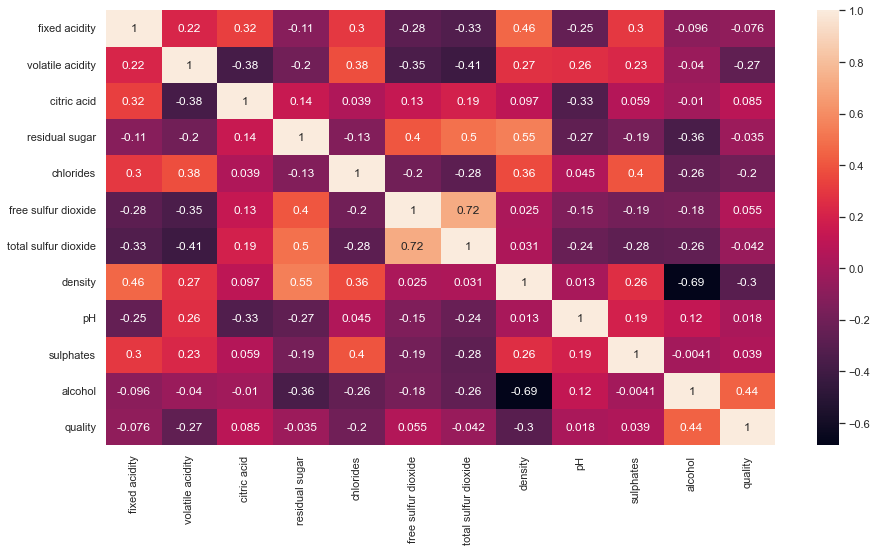

In [42]:
corr_matrix = dataset.corr()
g = sns.heatmap(corr_matrix, annot=True)
plt.show()

We don't see so much positive or negative correlation between features (>0.9)

## Convert to a classification problem

In [43]:
dataset["quality"] = [2 if x in range(7,11) else 1 if x in range(5,7) else 0 for x in dataset['quality']]

I'll arbitrary give a 2 (good wine) to wines with quality of 7 or higher, a 1 (average) to wines between 4 and 7 and 0 (bad) to wines with quality lesser than 5

In [44]:
dataset["quality"].value_counts()

1    4948
2    1271
0     244
Name: quality, dtype: int64

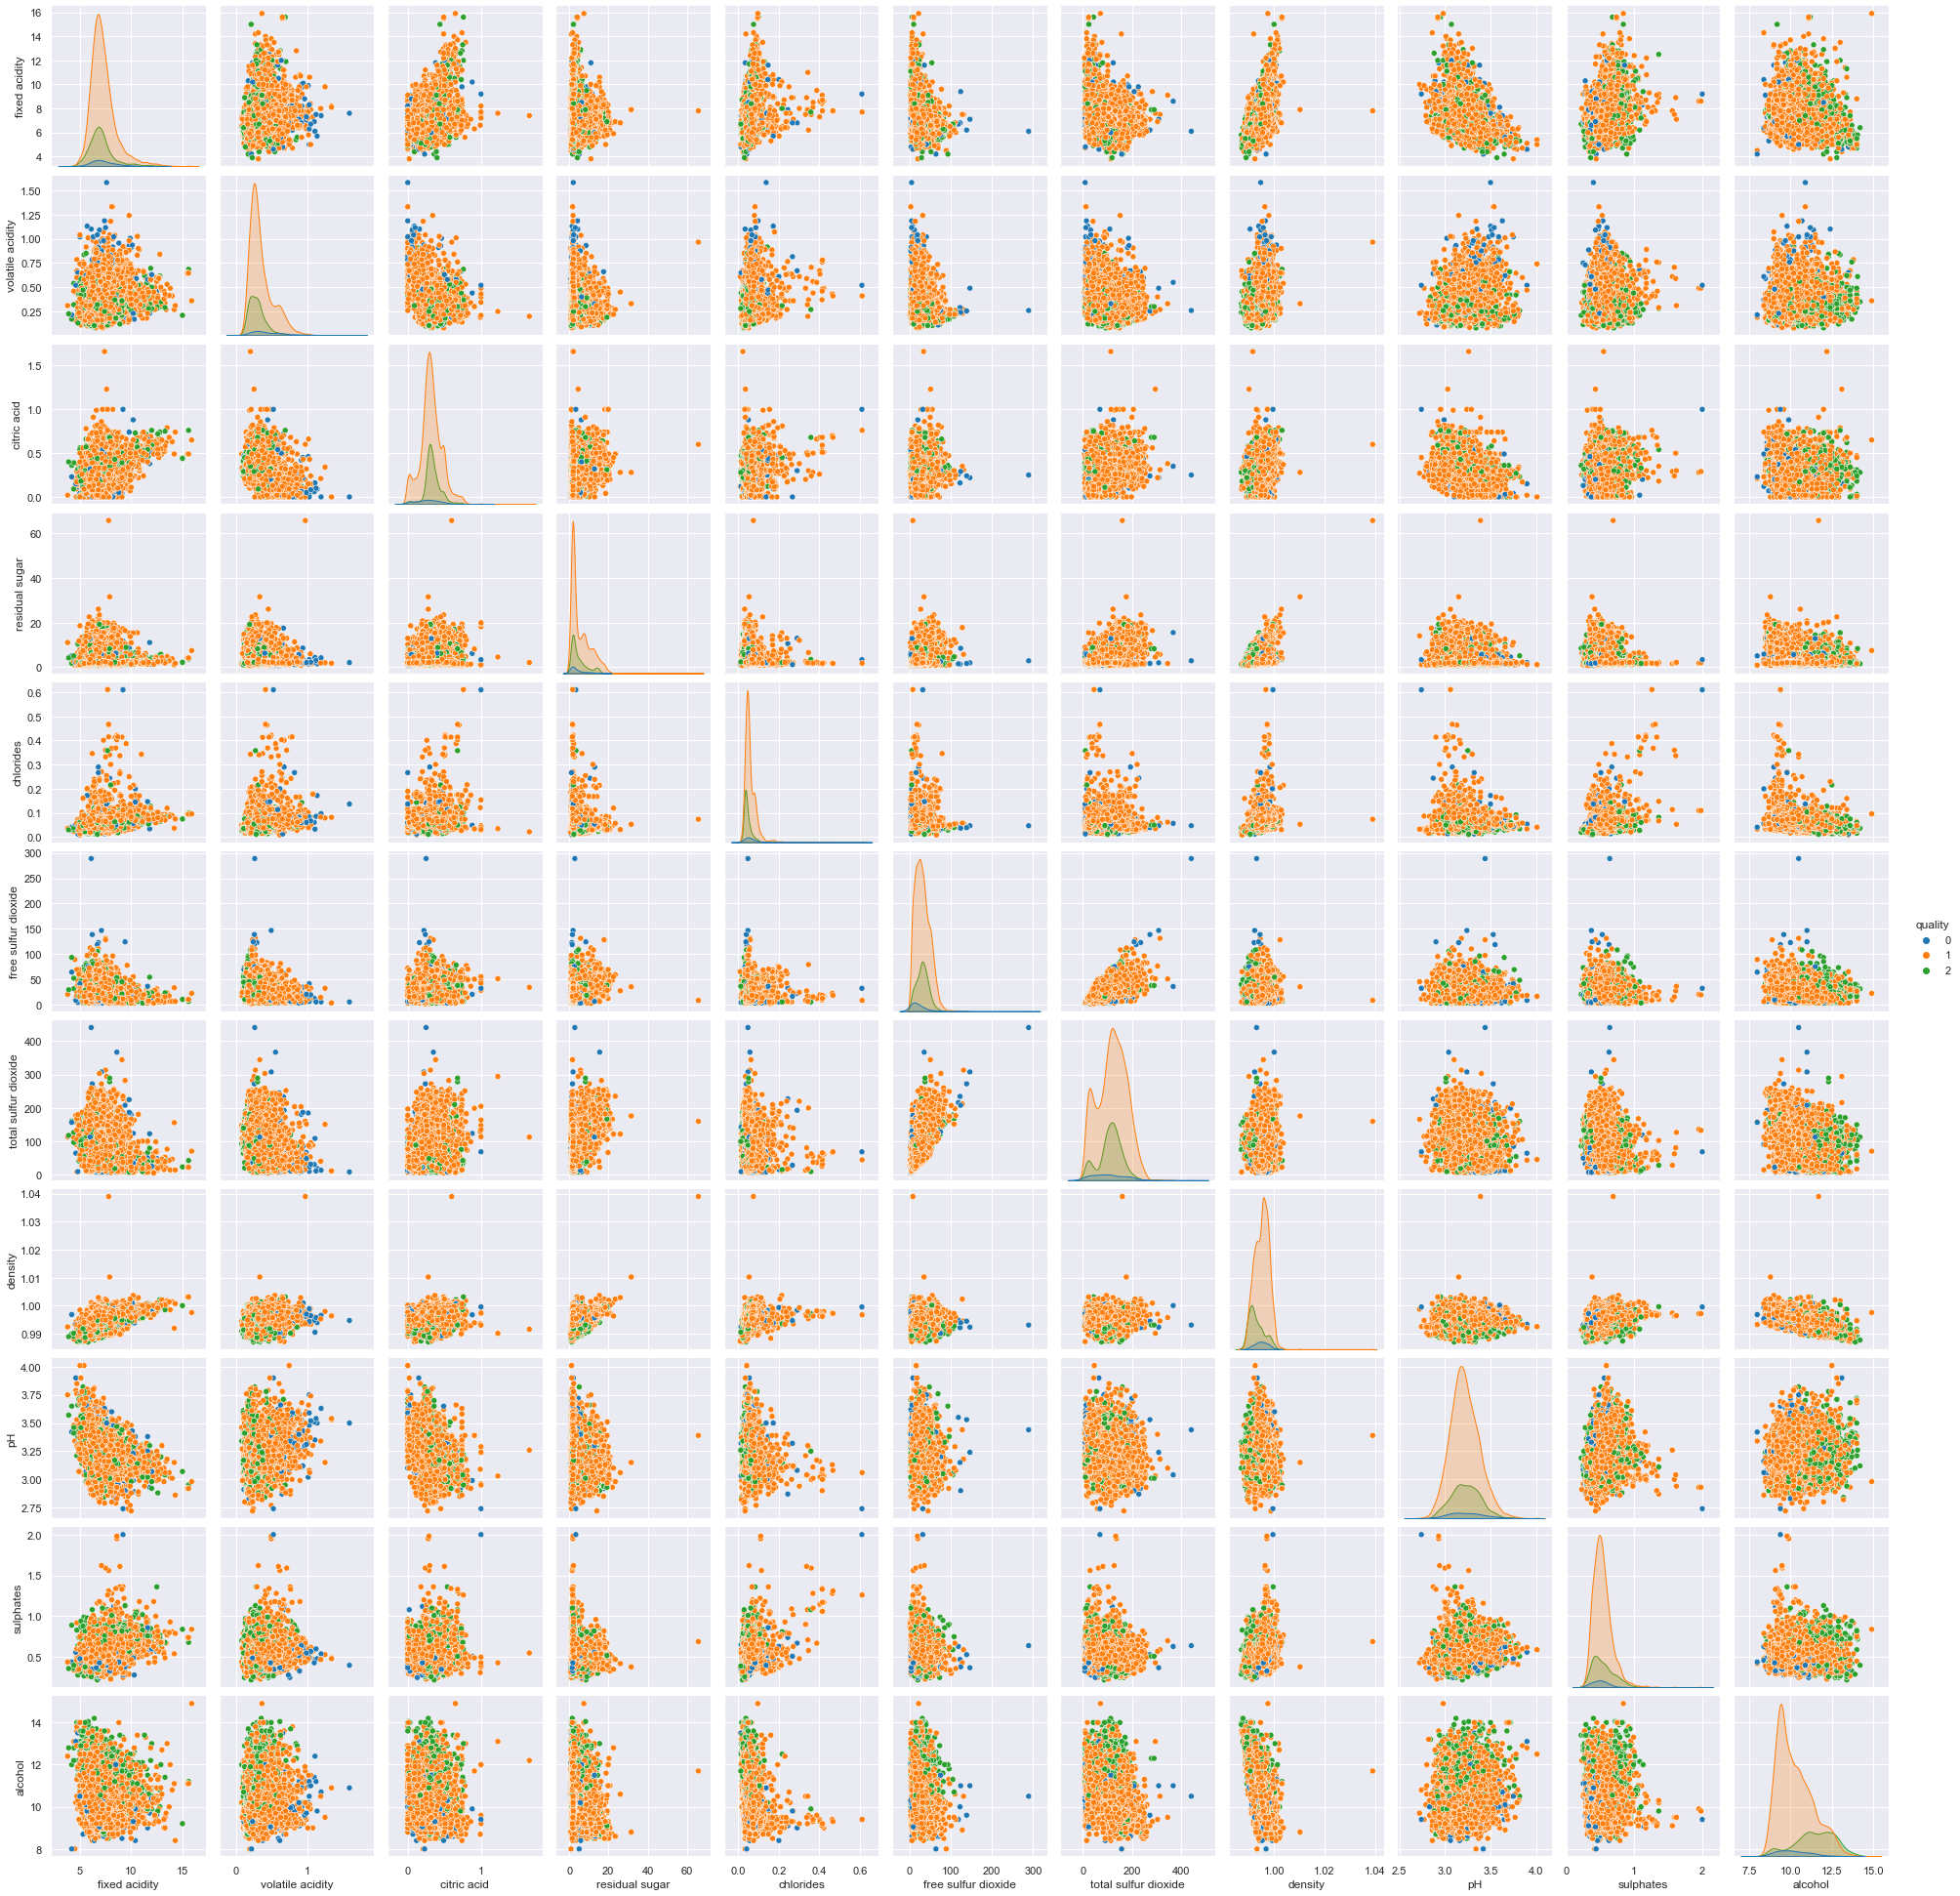

In [45]:
g = sns.pairplot(dataset, hue="quality",palette="tab10")
plt.show()

We observe the few values which quality take value disctint of 2

## Apply classification algorithms

### Split, scale and encode our categorical feature

In [46]:
scaler = StandardScaler()
X = dataset.drop("type",axis="columns").iloc[:,:-1].values
X = scaler.fit_transform(X)
y = dataset.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


### Logistic Regression

### 

In [47]:
classification_model = LogisticRegression(max_iter=10000)

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.7733952049497294
Confusion matrix
[[  0  46   0]
 [  2 948  54]
 [  0 191  52]]
Classifcation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.80      0.94      0.87      1004
           2       0.49      0.21      0.30       243

    accuracy                           0.77      1293
   macro avg       0.43      0.39      0.39      1293
weighted avg       0.71      0.77      0.73      1293



### Decision Tree

In [48]:
classification_model = DecisionTreeClassifier(criterion="gini")

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

Accuracy: 0.774168600154679
Confusion matrix
[[  9  31   6]
 [ 41 855 108]
 [  3 103 137]]
Classifcation report
              precision    recall  f1-score   support

           0       0.17      0.20      0.18        46
           1       0.86      0.85      0.86      1004
           2       0.55      0.56      0.55       243

    accuracy                           0.77      1293
   macro avg       0.53      0.54      0.53      1293
weighted avg       0.78      0.77      0.78      1293



### KNN

In [49]:
classification_model = KNeighborsClassifier(n_neighbors=5)

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

Accuracy: 0.8081979891724671
Confusion matrix
[[  6  38   2]
 [  6 915  83]
 [  1 118 124]]
Classifcation report
              precision    recall  f1-score   support

           0       0.46      0.13      0.20        46
           1       0.85      0.91      0.88      1004
           2       0.59      0.51      0.55       243

    accuracy                           0.81      1293
   macro avg       0.64      0.52      0.54      1293
weighted avg       0.79      0.81      0.80      1293



### Support vector machine

In [50]:
classification_model = SVC(kernel="linear")

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.7764887857695282
Confusion matrix
[[   0   46    0]
 [   0 1004    0]
 [   0  243    0]]
Classifcation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.78      1.00      0.87      1004
           2       0.00      0.00      0.00       243

    accuracy                           0.78      1293
   macro avg       0.26      0.33      0.29      1293
weighted avg       0.60      0.78      0.68      1293



### Kernel SVM

In [51]:
classification_model = SVC(kernel="rbf")

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.7950502706883217
Confusion matrix
[[  0  46   0]
 [  0 963  41]
 [  0 178  65]]
Classifcation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.81      0.96      0.88      1004
           2       0.61      0.27      0.37       243

    accuracy                           0.80      1293
   macro avg       0.47      0.41      0.42      1293
weighted avg       0.75      0.80      0.75      1293



### Random Forest

In [52]:
classification_model = RandomForestClassifier(criterion="entropy",n_estimators=1000)

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.8530549110595514
Confusion matrix
[[  4  41   1]
 [  1 972  31]
 [  0 116 127]]
Classifcation report
              precision    recall  f1-score   support

           0       0.80      0.09      0.16        46
           1       0.86      0.97      0.91      1004
           2       0.80      0.52      0.63       243

    accuracy                           0.85      1293
   macro avg       0.82      0.53      0.57      1293
weighted avg       0.85      0.85      0.83      1293



### Naive Bayes

In [53]:
classification_model = GaussianNB()

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.6921887084300077
Confusion matrix
[[  8  31   7]
 [ 55 731 218]
 [  5  82 156]]
Classifcation report
              precision    recall  f1-score   support

           0       0.12      0.17      0.14        46
           1       0.87      0.73      0.79      1004
           2       0.41      0.64      0.50       243

    accuracy                           0.69      1293
   macro avg       0.46      0.51      0.48      1293
weighted avg       0.75      0.69      0.71      1293



# Conclusion

We turn this dataset into a classification problem rating all wines with good, average or bad and we ran some classification algorithms and we could observe that Random Forest give us the best performance in this dataset